<a href="https://colab.research.google.com/github/abtin4079/OS_Course_first_phase/blob/main/Big_data_HW1_soal2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [19]:
!apt-get install openjdk-8-jdk-headless -qq > /dev/null
!wget -q http://archive.apache.org/dist/spark/spark-3.1.1/spark-3.1.1-bin-hadoop3.2.tgz
!tar xf spark-3.1.1-bin-hadoop3.2.tgz
!pip install -q findspark
!pip install spark-nlp

^C
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 540.7/540.7 kB 8.3 MB/s eta 0:00:00


In [20]:
import os
os.environ["JAVA_HOME"] = "/usr/lib/jvm/java-8-openjdk-amd64"
os.environ["SPARK_HOME"] = "/content/spark-3.1.1-bin-hadoop3.2"

In [59]:
import findspark
findspark.init()
from pyspark.sql import SparkSession
from pyspark import SparkContext, SparkConf
spark = SparkSession.builder.master("local[*]").getOrCreate()
spark.conf.set("spark.sql.repl.eagerEval.enabled", True) # Property used to format output tables better
spark
sc = SparkContext.getOrCreate(spark.conf)
from pyspark.ml.feature import VectorAssembler
from pyspark.ml.clustering import KMeans
#from pyspark.ml.evaluation import ClusteringEvaluator
from pyspark.sql.functions import split, col
import matplotlib.pyplot as plt

In [63]:
# Read the text file into an RDD (Resilient Distributed Dataset)
c1_txt = spark.read.text("/content/C1.txt")
c2_txt = spark.read.text("/content/C2.txt")
c3_txt = spark.read.text("/content/C3.txt")

In [81]:
# In this part we covert the textfile into the data frame in each line of text the values are separated with 4 spaces so:
c1_df = c1_txt.select(split(col("value"), "    ").alias("val"))
c1_df = c1_df.select(col("val")[1].cast("float").alias("X"),col("val")[2].cast("float").alias("Y"))\
  .where(col("X").isNotNull()|col("Y").isNotNull())

In [66]:
c1_df.show()

+--------+--------+
|       x|       y|
+--------+--------+
|624474.0|837604.0|
|673412.0|735362.0|
|647442.0|677000.0|
|532283.0|741384.0|
|646529.0|742844.0|
|647535.0|755101.0|
|644131.0|777721.0|
|521368.0|736923.0|
|688940.0|798967.0|
|592666.0|805244.0|
|645068.0|716248.0|
|666740.0|707391.0|
|662064.0|644958.0|
|630628.0|689662.0|
|623268.0|774834.0|
|617896.0|766560.0|
|560260.0|629298.0|
|595728.0|703618.0|
|594177.0|665266.0|
|544862.0|802997.0|
+--------+--------+
only showing top 20 rows



In [82]:
# In this text the numbers are separated with one tab so :
c2_df = c2_txt.select(split(col("value"), "\t").alias("asgar"))
c2_df = c2_df.select(col("asgar")[0].cast("float").alias("X"),col("asgar")[1].cast("float").alias("Y"))\
  .where(col("X").isNotNull()|col("Y").isNotNull())

In [77]:
c2_df.show()

+-----+-----+
|    x|    y|
+-----+-----+
|15.55|28.65|
| 14.9|27.55|
|14.45|28.35|
|14.15| 28.8|
|13.75|28.05|
|13.35|28.45|
| 13.0|29.15|
|13.45| 27.5|
| 13.6| 26.5|
| 12.8|27.35|
| 12.4|27.85|
| 12.3| 28.4|
| 12.2|28.65|
| 13.4| 25.1|
|12.95|25.95|
| 12.9| 26.5|
|11.85| 27.0|
|11.35| 28.0|
|11.15| 28.7|
|11.25| 27.4|
+-----+-----+
only showing top 20 rows



In [83]:
c3_df = c3_txt.select(split(col("value"), "\t").alias("asgar"))
c3_df = c3_df.select(col("asgar")[0].cast("float").alias("X"),col("asgar")[1].cast("float").alias("Y"))\
  .where(col("X").isNotNull()|col("Y").isNotNull())

In [79]:
c3_df.show()

+-----+----+
|    x|   y|
+-----+----+
|31.95|7.95|
|31.15| 7.3|
|30.45|6.65|
| 29.7| 6.0|
| 28.9|5.55|
|28.05| 5.0|
| 27.2|4.55|
|26.35|4.15|
| 25.4|3.85|
| 24.6| 3.6|
| 23.6| 3.3|
|22.75|3.15|
|21.85|3.05|
| 20.9| 3.0|
| 20.0| 2.9|
| 19.1| 3.0|
| 18.2| 3.2|
| 17.3|3.25|
|16.55| 3.5|
| 15.7| 3.7|
+-----+----+
only showing top 20 rows



In [84]:
# Assemble features into a single vector column
assembler = VectorAssembler(inputCols=["X", "Y"], outputCol="features")
C1_df_asm = assembler.transform(c1_df)
C2_df_asm = assembler.transform(c2_df)
C3_df_asm = assembler.transform(c3_df)

In [89]:
C1_cost_function = []
for k in range(2, 25):
  # Initialize KMeans with k-means++ initialization
  seed = 121 # 121 is just random
  kmeans = KMeans().setK(k).setSeed(seed).setInitMode("k-means||").setFeaturesCol("features").setPredictionCol("cluster")
  model = kmeans.fit(C1_df_asm)
  sum = model.summary
  C1_cost_function.append(sum.trainingCost)

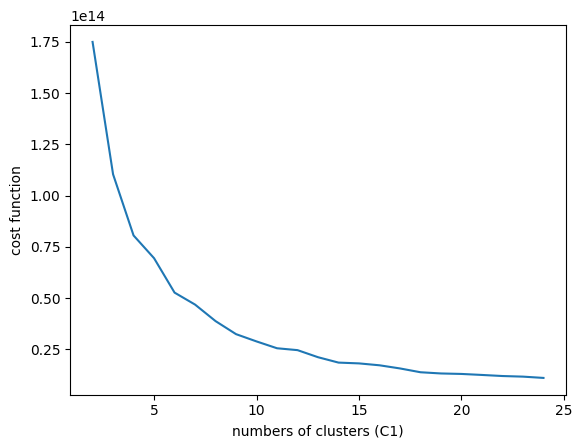

In [94]:
plt.plot(range(2, 25), C1_cost_function)
plt.xlabel('numbers of clusters (C1)')
plt.ylabel('cost function')
plt.show()

In [95]:
C2_cost_function = []
for k in range(2, 25):
  # Initialize KMeans with k-means++ initialization
  seed = 121 # 121 is just random
  kmeans = KMeans().setK(k).setSeed(seed).setInitMode("k-means||").setFeaturesCol("features").setPredictionCol("cluster")
  #fit the model
  model = kmeans.fit(C2_df_asm)
  #get the summary for sum information like trainingcost, centroid , ...
  sum = model.summary
  C2_cost_function.append(sum.trainingCost)

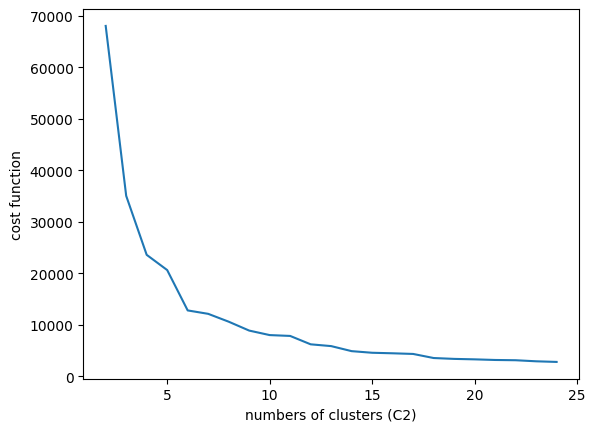

In [96]:
plt.plot(range(2, 25), C2_cost_function)
plt.xlabel('numbers of clusters (C2)')
plt.ylabel('cost function')
plt.show()

In [97]:
C3_cost_function = []
for k in range(2, 25):
  # Initialize KMeans with k-means++ initialization
  seed = 121 # 121 is just random
  kmeans = KMeans().setK(k).setSeed(seed).setInitMode("k-means||").setFeaturesCol("features").setPredictionCol("cluster")
  #fit the model
  model = kmeans.fit(C3_df_asm)
  #get the summary for sum information like trainingcost, centroid , ...
  sum = model.summary
  C3_cost_function.append(sum.trainingCost)

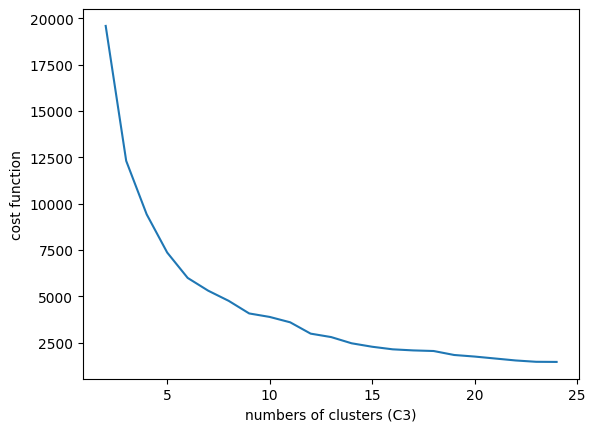

In [99]:
# plot the result of the for loop
plt.plot(range(2, 25), C3_cost_function)
plt.xlabel('numbers of clusters (C3)')
plt.ylabel('cost function')
plt.show()

**SO We choose K = 9 for C1 dataframe, K = 7 for C2 dataframe, K = 11 for C3 dataframe**

In [112]:
# for c1
k1 = 9
C1_Centroid = []
kmeans = KMeans().setK(k1).setSeed(seed).setInitMode("k-means||").setFeaturesCol("features").setPredictionCol("cluster")
model_1 = kmeans.fit(C1_df_asm)
C1_Centroid = model_1.clusterCenters()

In [113]:
# for c2
k2 = 7
C2_Centroid = []
kmeans = KMeans().setK(k2).setSeed(seed).setInitMode("k-means||").setFeaturesCol("features").setPredictionCol("cluster")
model_2 = kmeans.fit(C2_df_asm)
C2_Centroid = model_2.clusterCenters()

In [114]:
# for c3
k3 = 7
C3_Centroid = []
kmeans = KMeans().setK(k3).setSeed(seed).setInitMode("k-means||").setFeaturesCol("features").setPredictionCol("cluster")
model_2 = kmeans.fit(C3_df_asm)
C3_Centroid = model_2.clusterCenters()